In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [ ]:
folder = 'MDataFiles_Stage1/'

Seeds = pd.read_csv('MNCAATourneySeeds.csv')

display(Seeds)

Conferences = pd.read_csv('MTeamConferences.csv')

display(Conferences)

RegularDetail = pd.read_csv('MRegularSeasonDetailedResults.csv')

display(RegularDetail)

TourneyCompact = pd.read_csv('MNCAATourneyCompactResults.csv')

display(TourneyCompact)

display(RegularDetail.columns.values)


,Season,Seed,TeamID
0,1985,W01,1207
1,1985,W02,1210
2,1985,W03,1228
3,1985,W04,1260
4,1985,W05,1374
...,...,...,...
2349,2021,Z12,1457
2350,2021,Z13,1317
2351,2021,Z14,1159
2352,2021,Z15,1331


,Season,TeamID,ConfAbbrev
0,1985,1102,wac
1,1985,1103,ovc
2,1985,1104,sec
3,1985,1106,swac
4,1985,1108,swac
...,...,...,...
12294,2022,1468,a_sun
12295,2022,1469,wac
12296,2022,1470,wac
12297,2022,1471,big_west


,Season,DayNum,WTeamID,WScore,LTeamID,LScore,WLoc,NumOT,WFGM,WFGA,...,LFGA3,LFTM,LFTA,LOR,LDR,LAst,LTO,LStl,LBlk,LPF
0,2003,10,1104,68,1328,62,N,0,27,58,...,10,16,22,10,22,8,18,9,2,20
1,2003,10,1272,70,1393,63,N,0,26,62,...,24,9,20,20,25,7,12,8,6,16
2,2003,11,1266,73,1437,61,N,0,24,58,...,26,14,23,31,22,9,12,2,5,23
3,2003,11,1296,56,1457,50,N,0,18,38,...,22,8,15,17,20,9,19,4,3,23
4,2003,11,1400,77,1208,71,N,0,30,61,...,16,17,27,21,15,12,10,7,1,14
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
100418,2022,98,1400,79,1242,76,H,0,28,67,...,13,15,23,5,24,10,15,3,5,21
100419,2022,98,1411,66,1126,63,A,0,24,59,...,21,15,24,5,23,10,19,13,2,23
100420,2022,98,1422,68,1441,49,A,0,23,56,...,24,8,11,10,18,5,16,8,2,12
100421,2022,98,1438,69,1181,68,A,0,31,65,...,17,18,22,11,25,14,14,3,9,11


,Season,DayNum,WTeamID,WScore,LTeamID,LScore,WLoc,NumOT
0,1985,136,1116,63,1234,54,N,0
1,1985,136,1120,59,1345,58,N,0
2,1985,136,1207,68,1250,43,N,0
3,1985,136,1229,58,1425,55,N,0
4,1985,136,1242,49,1325,38,N,0
...,...,...,...,...,...,...,...,...
2312,2021,148,1211,85,1425,66,N,0
2313,2021,148,1417,51,1276,49,N,0
2314,2021,152,1124,78,1222,59,N,0
2315,2021,152,1211,93,1417,90,N,1


array(['Season', 'DayNum', 'WTeamID', 'WScore', 'LTeamID', 'LScore',
       'WLoc', 'NumOT', 'WFGM', 'WFGA', 'WFGM3', 'WFGA3', 'WFTM', 'WFTA',
       'WOR', 'WDR', 'WAst', 'WTO', 'WStl', 'WBlk', 'WPF', 'LFGM', 'LFGA',
       'LFGM3', 'LFGA3', 'LFTM', 'LFTA', 'LOR', 'LDR', 'LAst', 'LTO',
       'LStl', 'LBlk', 'LPF'], dtype=object)

In [ ]:
from re import A
WinTeams = pd.DataFrame()
LoseTeams = pd.DataFrame()

columns = ['Season', 'TeamID', 'Points', 'OppPoints',
        'Loc','NumOT', 'FGM', 'FGA', 'FGM3', 'FGA3', 'FTM', 'FTA',
       'OR', 'DR', 'Ast', 'TO', 'Stl', 'Blk', 'PF', 'OppFGM', 'OppFGA',
       'OppFGM3', 'OppFGA3', 'OppFTM', 'OppFTA', 'OppOR', 'OppDR', 'OppAst', 'OppTO',
       'OppStl', 'OppBlk', 'OppPF']

WinTeams[columns] = RegularDetail[['Season', 'WTeamID', 'WScore', 'LScore',
       'WLoc', 'NumOT', 'WFGM', 'WFGA', 'WFGM3', 'WFGA3', 'WFTM', 'WFTA',
       'WOR', 'WDR', 'WAst', 'WTO', 'WStl', 'WBlk', 'WPF', 'LFGM', 'LFGA',
       'LFGM3', 'LFGA3', 'LFTM', 'LFTA', 'LOR', 'LDR', 'LAst', 'LTO',
       'LStl', 'LBlk', 'LPF']]

WinTeams['Wins'] = 1
WinTeams['Losses'] = 0

LoseTeams[columns] = RegularDetail[['Season', 'LTeamID', 'LScore', 'WScore',
       'WLoc', 'NumOT', 'LFGM', 'LFGA', 'LFGM3', 'LFGA3', 'LFTM', 'LFTA',
       'LOR', 'LDR', 'LAst', 'LTO', 'LStl', 'LBlk', 'LPF', 'WFGM', 'WFGA',
       'WFGM3', 'WFGA3', 'WFTM', 'WFTA', 'WOR', 'WDR', 'WAst', 'WTO',
       'WStl', 'WBlk', 'WPF']]

def change_loc(loc):
  if loc == 'H':
    return 'A'
  elif loc == 'A':
    return 'H'
  else:
    return 'N'

LoseTeams['Loc'] = LoseTeams['Loc'].apply(change_loc)

LoseTeams['Wins'] = 0
LoseTeams['Losses'] = 1

WinLoseTeams = pd.concat([WinTeams, LoseTeams])
combinedTeams = WinLoseTeams.groupby(['Season', 'TeamID']).sum()
combinedTeams['NumGames'] = combinedTeams['Wins'] + combinedTeams['Losses']
display(WinLoseTeams)
display(combinedTeams)


,Season,TeamID,Points,OppPoints,Loc,NumOT,FGM,FGA,FGM3,FGA3,...,OppFTA,OppOR,OppDR,OppAst,OppTO,OppStl,OppBlk,OppPF,Wins,Losses
0,2003,1104,68,62,N,0,27,58,3,14,...,22,10,22,8,18,9,2,20,1,0
1,2003,1272,70,63,N,0,26,62,8,20,...,20,20,25,7,12,8,6,16,1,0
2,2003,1266,73,61,N,0,24,58,8,18,...,23,31,22,9,12,2,5,23,1,0
3,2003,1296,56,50,N,0,18,38,3,9,...,15,17,20,9,19,4,3,23,1,0
4,2003,1400,77,71,N,0,30,61,6,14,...,27,21,15,12,10,7,1,14,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
100418,2022,1242,76,79,A,0,28,48,5,13,...,23,14,18,8,6,7,2,21,0,1
100419,2022,1126,63,66,H,0,20,49,8,21,...,28,12,27,9,19,10,5,19,0,1
100420,2022,1441,49,68,H,0,18,53,5,24,...,13,11,22,11,15,11,1,13,0,1
100421,2022,1181,68,69,H,0,22,52,6,17,...,9,10,20,16,5,10,2,17,0,1


Points  OppPoints                           Loc  NumOT  FGM  \
Season TeamID                                                                
2003   1102      1603       1596  HAHAHAHHHHHHAAANHAAAAAHAAHHN      0  536   
       1103      2127       2110   AHHHHHAHHHAAHAHAAAAAHAHAHAH      8  733   
       1104      1940       1820  NHHNHHNHHHHHHHAHHAAAAHAAHAAN      1  673   
       1105      1866       1993    HAHAHHHAAHAAHAHHHAAHAAAHAA      4  634   
       1106      1781       1785  AHHHAAAHHHHHANNAAAHAAAHAAHAH      1  656   
...               ...        ...                           ...    ...  ...   
2022   1468      1332       1418          NAHHAHHAAAAAANAAHAHH      1  501   
       1469      1321       1473           HHAAHHAANAAHAHHAAAA      0  458   
       1470      1332       1396         HHAHHAAHAAAAAAHAAAAHH      1  475   
       1471      1342       1422          AHAHHHHAANAAAAAAHAHA      1  454   
       1472      1382       1484           ANNAHAAAAAHAHHHAAAA      0  496   

                FGA  FGM3  FGA3  FTM  FTA  ...  OppOR  OppDR  OppAst  OppTO  \
Season TeamID                              ...                                
2003   1102    1114   219   583  312  479  ...    269    564     256    363   
       1103    1508   147   434  514  698  ...    325    595     418    414   
       1104    1601   178   556  416  586  ...    305    634     327    388   
       1105    1602   197   540  401  568  ...    343    686     411    489   
       1106    1548   171   494  298  461  ...    317    626     330    422   
...             ...   ...   ...  ...  ...  ...    ...    ...     ...    ...   
2022   1468    1097   143   442  187  251  ...    178    461     275    225   
       1469    1111   123   411  282  408  ...    169    498     289    237   
       1470    1153   108   350  274  369  ...    182    511     288    332   
       1471    1048   162   474  272  372  ...    170    497     257    238   
       1472    1140   204   571  186  240  ...    143    498     263    202   

               OppStl  OppBlk  OppPF  Wins  Losses  NumGames  
Season TeamID                                                 
2003   1102       152      44    514    12      16        28  
       1103       173      77    606    13      14        27  
       1104       155      89    539    17      11        28  
       1105       244     109    496     7      19        26  
       1106       246      89    452    13      15        28  
...               ...     ...    ...   ...     ...       ...  
2022   1468       113      46    318     9      11        20  
       1469       146      78    389     7      12        19  
       1470        91     119    366     8      13        21  
       1471       137      52    353     8      12        20  
       1472        75      69    290     5      14        19  

[6892 rows x 33 columns]

In [ ]:
RegularSeasonInput = pd.DataFrame()

RegularSeasonInput['WinRatio'] = combinedTeams['Wins'] / combinedTeams['NumGames']
RegularSeasonInput['PointsPerGame'] = combinedTeams['Points'] / combinedTeams['NumGames']
RegularSeasonInput['PointsAllowedPerGame'] = combinedTeams['OppPoints'] / combinedTeams['NumGames']
RegularSeasonInput['PointsRatio'] = combinedTeams['Points'] / combinedTeams['OppPoints']
RegularSeasonInput['OTsPerGame'] = combinedTeams['NumOT'] / combinedTeams['NumGames']

RegularSeasonInput['FGPerGame'] = combinedTeams['FGM'] / combinedTeams['NumGames']
RegularSeasonInput['FGRatio'] = combinedTeams['FGM'] / combinedTeams['FGA']
RegularSeasonInput['FGAllowedPerGame'] = combinedTeams['OppFGM'] / combinedTeams['NumGames']

RegularSeasonInput['FG3PerGame'] = combinedTeams['FGM3'] / combinedTeams['NumGames']
RegularSeasonInput['FG3Ratio'] = combinedTeams['FGM3'] / combinedTeams['FGA3']
RegularSeasonInput['FG3AllowedPerGame'] = combinedTeams['OppFGM3'] / combinedTeams['NumGames']

RegularSeasonInput['FTPerGame'] = combinedTeams['FTM'] / combinedTeams['NumGames']
RegularSeasonInput['FTRatio'] = combinedTeams['FTM'] / combinedTeams['FTA']
RegularSeasonInput['FTAllowedPerGame'] = combinedTeams['OppFTM'] / combinedTeams['NumGames']

RegularSeasonInput['ORRatio'] = combinedTeams['OR'] / (combinedTeams['OR'] + combinedTeams['OppDR'])
RegularSeasonInput['DRRatio'] = combinedTeams['DR'] / (combinedTeams['DR'] + combinedTeams['OppOR'])
RegularSeasonInput['AstPerGame'] = combinedTeams['Ast'] / combinedTeams['NumGames']


RegularSeasonInput['TOPerGame'] = combinedTeams['TO'] / combinedTeams['NumGames']
RegularSeasonInput['StlPerGame'] = combinedTeams['Stl'] / combinedTeams['NumGames']
RegularSeasonInput['BlkPerGame'] = combinedTeams['Blk'] / combinedTeams['NumGames']
RegularSeasonInput['PFPerGame'] = combinedTeams['PF'] / combinedTeams['NumGames']



display(RegularSeasonInput.isna().sum())
display(RegularSeasonInput.describe())
display(RegularSeasonInput)

WinRatio                0
PointsPerGame           0
PointsAllowedPerGame    0
PointsRatio             0
OTsPerGame              0
FGPerGame               0
FGRatio                 0
FGAllowedPerGame        0
FG3PerGame              0
FG3Ratio                0
FG3AllowedPerGame       0
FTPerGame               0
FTRatio                 0
FTAllowedPerGame        0
ORRatio                 0
DRRatio                 0
AstPerGame              0
TOPerGame               0
StlPerGame              0
BlkPerGame              0
PFPerGame               0
dtype: int64

,WinRatio,PointsPerGame,PointsAllowedPerGame,PointsRatio,OTsPerGame,FGPerGame,FGRatio,FGAllowedPerGame,FG3PerGame,FG3Ratio,...,FTPerGame,FTRatio,FTAllowedPerGame,ORRatio,DRRatio,AstPerGame,TOPerGame,StlPerGame,BlkPerGame,PFPerGame
count,6892.000000,6892.000000,6892.000000,6892.000000,6892.000000,6892.000000,6892.000000,6892.000000,6892.000000,6892.000000,...,6892.000000,6892.000000,6892.000000,6892.000000,6892.000000,6892.000000,6892.000000,6892.000000,6892.000000,6892.000000
mean,0.494102,69.461140,69.676889,1.001182,0.068303,24.429260,0.435921,24.499946,6.680315,0.342922,...,13.922272,0.696903,13.982630,0.309057,0.689415,13.035270,13.554449,6.491325,3.308914,17.826441
std,0.188209,5.835748,5.549137,0.096713,0.060351,2.166095,0.026510,2.210511,1.401041,0.028863,...,2.144978,0.039317,2.212656,0.046460,0.038291,1.863353,1.833738,1.257087,1.089374,3.476077
min,0.000000,49.240000,50.428571,0.625313,0.000000,16.120000,0.342072,16.962963,1.838710,0.237838,...,7.000000,0.542461,7.347826,0.133433,0.554890,7.518519,7.387097,2.875000,0.655172,0.000000
25%,0.357143,65.500000,65.965209,0.934764,0.031250,22.966379,0.418115,22.966667,5.692308,0.323529,...,12.447318,0.670683,12.422571,0.278974,0.662785,11.732692,12.312500,5.593750,2.518519,16.969697
50%,0.500000,69.428571,69.550056,0.997408,0.062500,24.387097,0.436036,24.430952,6.586207,0.342282,...,13.896552,0.697740,13.870968,0.312357,0.687201,12.928571,13.419355,6.406250,3.192308,18.354839
75%,0.633333,73.343750,73.200000,1.064353,0.100000,25.851852,0.453580,25.906960,7.593750,0.362275,...,15.354839,0.723926,15.420577,0.341507,0.714763,14.269231,14.700000,7.266667,3.941176,19.666667
max,1.000000,95.551724,98.206897,1.391685,0.400000,34.153846,0.550868,37.200000,13.250000,0.450602,...,21.484848,0.832898,23.518519,0.453014,0.826291,21.484848,22.321429,13.241379,9.333333,27.884615


WinRatio  PointsPerGame  PointsAllowedPerGame  PointsRatio  \
Season TeamID                                                               
2003   1102    0.428571      57.250000             57.000000     1.004386   
       1103    0.481481      78.777778             78.148148     1.008057   
       1104    0.607143      69.285714             65.000000     1.065934   
       1105    0.269231      71.769231             76.653846     0.936277   
       1106    0.464286      63.607143             63.750000     0.997759   
...                 ...            ...                   ...          ...   
2022   1468    0.450000      66.600000             70.900000     0.939351   
       1469    0.368421      69.526316             77.526316     0.896809   
       1470    0.380952      63.428571             66.476190     0.954155   
       1471    0.400000      67.100000             71.100000     0.943741   
       1472    0.263158      72.736842             78.105263     0.931267   

               OTsPerGame  FGPerGame   FGRatio  FGAllowedPerGame  FG3PerGame  \
Season TeamID                                                                  
2003   1102      0.000000  19.142857  0.481149         19.285714    7.821429   
       1103      0.296296  27.148148  0.486074         27.777778    5.444444   
       1104      0.035714  24.035714  0.420362         23.250000    6.357143   
       1105      0.153846  24.384615  0.395755         27.000000    7.576923   
       1106      0.035714  23.428571  0.423773         21.714286    6.107143   
...                   ...        ...       ...               ...         ...   
2022   1468      0.050000  25.050000  0.456700         25.300000    7.150000   
       1469      0.000000  24.105263  0.412241         28.315789    6.473684   
       1470      0.047619  22.619048  0.411969         23.142857    5.142857   
       1471      0.050000  22.700000  0.433206         28.150000    8.100000   
       1472      0.000000  26.105263  0.435088         28.578947   10.736842   

               FG3Ratio  ...  FTPerGame   FTRatio  FTAllowedPerGame   ORRatio  \
Season TeamID            ...                                                    
2003   1102    0.375643  ...  11.142857  0.651357         13.678571  0.171806   
       1103    0.338710  ...  19.037037  0.736390         15.925926  0.307334   
       1104    0.320144  ...  14.857143  0.709898         12.142857  0.374753   
       1105    0.364815  ...  15.423077  0.705986         16.384615  0.338476   
       1106    0.346154  ...  10.642857  0.646421         15.535714  0.354639   
...                 ...  ...        ...       ...               ...       ...   
2022   1468    0.323529  ...   9.350000  0.745020         11.150000  0.203800   
       1469    0.299270  ...  14.842105  0.691176         13.105263  0.250000   
       1470    0.308571  ...  13.047619  0.742547         12.619048  0.232733   
       1471    0.341772  ...  13.600000  0.731183          8.900000  0.161889   
       1472    0.357268  ...   9.789474  0.775000         11.789474  0.179572   

                DRRatio  AstPerGame  TOPerGame  StlPerGame  BlkPerGame  \
Season TeamID                                                            
2003   1102    0.636486   13.000000  11.428571    5.964286    1.785714   
       1103    0.623407   15.222222  12.629630    7.259259    2.333333   
       1104    0.687179   12.107143  13.285714    6.607143    3.785714   
       1105    0.636653   14.538462  18.653846    9.307692    2.076923   
       1106    0.678173   11.678571  17.035714    8.357143    3.142857   
...                 ...         ...        ...         ...         ...   
2022   1468    0.698816   13.300000   9.750000    4.850000    1.600000   
       1469    0.726537   14.631579  15.052632    6.210526    2.315789   
       1470    0.687822   10.142857  10.190476    8.190476    2.142857   
       1471    0.720854   11.950000  13.250000    5.500000    1.600000   
       1472    0.720157   11.8

In [ ]:
seed_dict = Seeds.set_index(['Season','TeamID'])

TourneyInput = pd.DataFrame()

winIDs = TourneyCompact['WTeamID']
loseIDs= TourneyCompact['LTeamID']
season = TourneyCompact['Season']

winners = pd.DataFrame()
winners[['Season','Team1','Team2']] = TourneyCompact[['Season','WTeamID','LTeamID']]
winners['Result'] = 1

losers = pd.DataFrame()
losers[['Season','Team1','Team2']] = TourneyCompact[['Season','LTeamID','WTeamID']]
losers['Result'] = 0

TourneyInput = pd.concat([winners, losers])
TourneyInput = TourneyInput[TourneyInput['Season']>=2003].reset_index(drop=True)

team1seeds = []
team2seeds = []

for x in range(len(TourneyInput)):
  idx = (TourneyInput['Season'][x], TourneyInput['Team1'][x])
  seed = seed_dict.loc[idx].values[0]
  if len(seed) == 4:
    seed = int(seed[1:-1])
  else:
    seed = int(seed[1:])
  team1seeds.append(seed)

for x in range(len(TourneyInput)):
  idx = (TourneyInput['Season'][x], TourneyInput['Team2'][x])
  seed = seed_dict.loc[idx].values[0]
  if len(seed) == 4:
    seed = int(seed[1:-1])
  else:
    seed = int(seed[1:])
  team2seeds.append(seed)

TourneyInput['Team1Seed'] = team1seeds
TourneyInput['Team2Seed'] = team2seeds


display(TourneyInput)

,Season,Team1,Team2,Result,Team1Seed,Team2Seed
0,2003,1421,1411,1,16,16
1,2003,1112,1436,1,1,16
2,2003,1113,1272,1,10,7
3,2003,1141,1166,1,11,6
4,2003,1143,1301,1,8,9
...,...,...,...,...,...,...
2357,2021,1425,1211,0,6,1
2358,2021,1276,1417,0,1,11
2359,2021,1222,1124,0,2,1
2360,2021,1417,1211,0,11,1


In [ ]:


outscores = []
for x in range(len(TourneyInput)):
    try:
        idx1 = (TourneyInput['Season'][x], TourneyInput['Team1'][x])
        team1score = RegularSeasonInput.loc[idx1].copy()
        team1score['Seed'] = TourneyInput['Team1Seed'][x]

        idx2 = (TourneyInput['Season'][x], TourneyInput['Team2'][x])
        team2score = RegularSeasonInput.loc[idx2].copy()
        team2score['Seed'] = TourneyInput['Team2Seed'][x]

        outscore = team1score - team2score
        outscore['Result'] = TourneyInput['Result'][x]
        outscores.append(outscore)
    except KeyError as e:
        print(f"Missing data for index: {e}")

outscores = pd.DataFrame(outscores)

display(outscores)
display(outscores.describe())


,WinRatio,PointsPerGame,PointsAllowedPerGame,PointsRatio,OTsPerGame,FGPerGame,FGRatio,FGAllowedPerGame,FG3PerGame,FG3Ratio,...,FTAllowedPerGame,ORRatio,DRRatio,AstPerGame,TOPerGame,StlPerGame,BlkPerGame,PFPerGame,Seed,Result
0,-0.151724,-1.593103,7.614943,-0.120072,0.139080,-0.354023,-0.018262,2.126437,0.549425,0.039433,...,3.274713,-0.015697,-0.047099,-1.165517,0.973563,0.635632,0.766667,0.803448,0.0,1.0
1,0.237685,17.421182,7.112069,0.139285,0.002463,5.493842,0.016969,3.598522,1.759852,0.009777,...,0.662562,0.022337,-0.050163,3.435961,0.716749,1.602217,1.248768,1.853448,-15.0,1.0
2,-0.172414,1.448276,3.344828,-0.033801,0.034483,0.931034,0.040251,1.517241,-3.000000,-0.030989,...,0.758621,0.026172,0.001629,-1.068966,0.206897,-2.172414,-0.827586,0.655172,3.0,1.0
3,-0.085684,0.102403,8.908046,-0.148414,-0.030303,-2.076280,0.005763,2.466040,-1.142111,-0.008284,...,3.889237,0.021658,-0.021651,-1.197492,4.877743,-1.290491,-0.454545,3.692790,5.0,1.0
4,0.124138,2.082759,1.758621,0.003015,0.070115,3.011494,0.009399,1.945977,-1.552874,0.022444,...,-3.503448,0.015999,0.009181,1.333333,-0.027586,-1.214943,-0.273563,-1.563218,-1.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2357,-0.241379,-17.356764,-4.011936,-0.184472,0.137931,-6.981432,-0.083767,-2.025199,-0.997347,-0.016775,...,-0.322281,0.049546,-0.037774,-4.652520,0.180371,-3.514589,2.395225,0.905836,5.0,0.0
2358,0.179487,3.403846,-3.125000,0.102900,-0.189103,1.490385,0.021778,-0.782051,0.887821,0.019449,...,-0.493590,-0.013723,-0.000212,1.842949,-0.217949,-0.660256,1.637821,1.862179,-10.0,0.0
2359,-0.032051,-8.067308,-8.108974,0.038318,-0.041667,-4.429487,-0.054730,-4.650641,-1.217949,-0.063422,...,2.150641,0.035001,0.055551,-3.349359,-2.012821,-1.112179,0.903846,0.057692,1.0,0.0
2360,-0.346154,-19.269231,-0.615385,-0.269329,0.230769,-7.769231,-0.088916,-0.961538,-0.653846,0.002620,...,0.461538,0.007381,-0.007005,-4.692308,-1.038462,-3.230769,-0.192308,0.769231,10.0,0.0


,WinRatio,PointsPerGame,PointsAllowedPerGame,PointsRatio,OTsPerGame,FGPerGame,FGRatio,FGAllowedPerGame,FG3PerGame,FG3Ratio,...,FTAllowedPerGame,ORRatio,DRRatio,AstPerGame,TOPerGame,StlPerGame,BlkPerGame,PFPerGame,Seed,Result
count,2362.000000,2362.000000,2362.000000,2.362000e+03,2362.000000,2.362000e+03,2362.000000,2.362000e+03,2.362000e+03,2362.000000,...,2.362000e+03,2362.000000,2362.000000,2362.000000,2362.000000,2362.000000,2362.000000,2.362000e+03,2362.000000,2362.000000
mean,0.000000,0.000000,0.000000,-3.008225e-18,0.000000,4.813160e-17,0.000000,2.406580e-17,-6.016450e-18,0.000000,...,-4.813160e-17,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-2.406580e-17,0.000000,0.500000
std,0.146005,7.335900,6.425300,1.066465e-01,0.073449,2.935077e+00,0.032670,2.664932e+00,1.807514e+00,0.037578,...,2.790071e+00,0.056296,0.040521,2.594955,2.094783,1.859996,1.831655,2.497858e+00,7.487841,0.500106
min,-0.633333,-22.892857,-25.035714,-4.004886e-01,-0.293169,-9.357143e+00,-0.121150,-9.978610e+00,-6.062500e+00,-0.139760,...,-1.000909e+01,-0.191864,-0.144988,-9.220143,-7.666667,-6.283681,-6.752688,-7.896552e+00,-15.000000,0.000000
25%,-0.093750,-4.864448,-4.359807,-6.555868e-02,-0.035484,-1.998377e+00,-0.021775,-1.741014e+00,-1.187500e+00,-0.023836,...,-1.939394e+00,-0.036803,-0.027785,-1.754493,-1.349484,-1.237955,-1.164783,-1.727774e+00,-5.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000e+00,0.000000,0.000000e+00,0.000000e+00,0.000000,...,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.500000
75%,0.093750,4.864448,4.359807,6.555868e-02,0.035484,1.998377e+00,0.021775,1.741014e+00,1.187500e+00,0.023836,...,1.939394e+00,0.036803,0.027785,1.754493,1.349484,1.237955,1.164783,1.727774e+00,5.000000,1.000000
max,0.633333,22.892857,25.035714,4.004886e-01,0.293169,9.357143e+00,0.121150,9.978610e+00,6.062500e+00,0.139760,...,1.000909e+01,0.191864,0.144988,9.220143,7.666667,6.283681,6.752688,7.896552e+00,15.000000,1.000000


WinRatio                0.34
PointsPerGame           0.23
PointsAllowedPerGame    0.17
PointsRatio             0.42
OTsPerGame              0.12
FGPerGame               0.26
FGRatio                 0.21
FGAllowedPerGame        0.10
FG3PerGame              0.05
FG3Ratio                0.10
FG3AllowedPerGame       0.06
FTPerGame               0.02
FTRatio                 0.04
FTAllowedPerGame        0.17
ORRatio                 0.21
DRRatio                 0.02
AstPerGame              0.19
TOPerGame               0.16
StlPerGame              0.11
BlkPerGame              0.21
PFPerGame               0.17
Seed                    0.49
Result                  1.00
Name: Result, dtype: float64

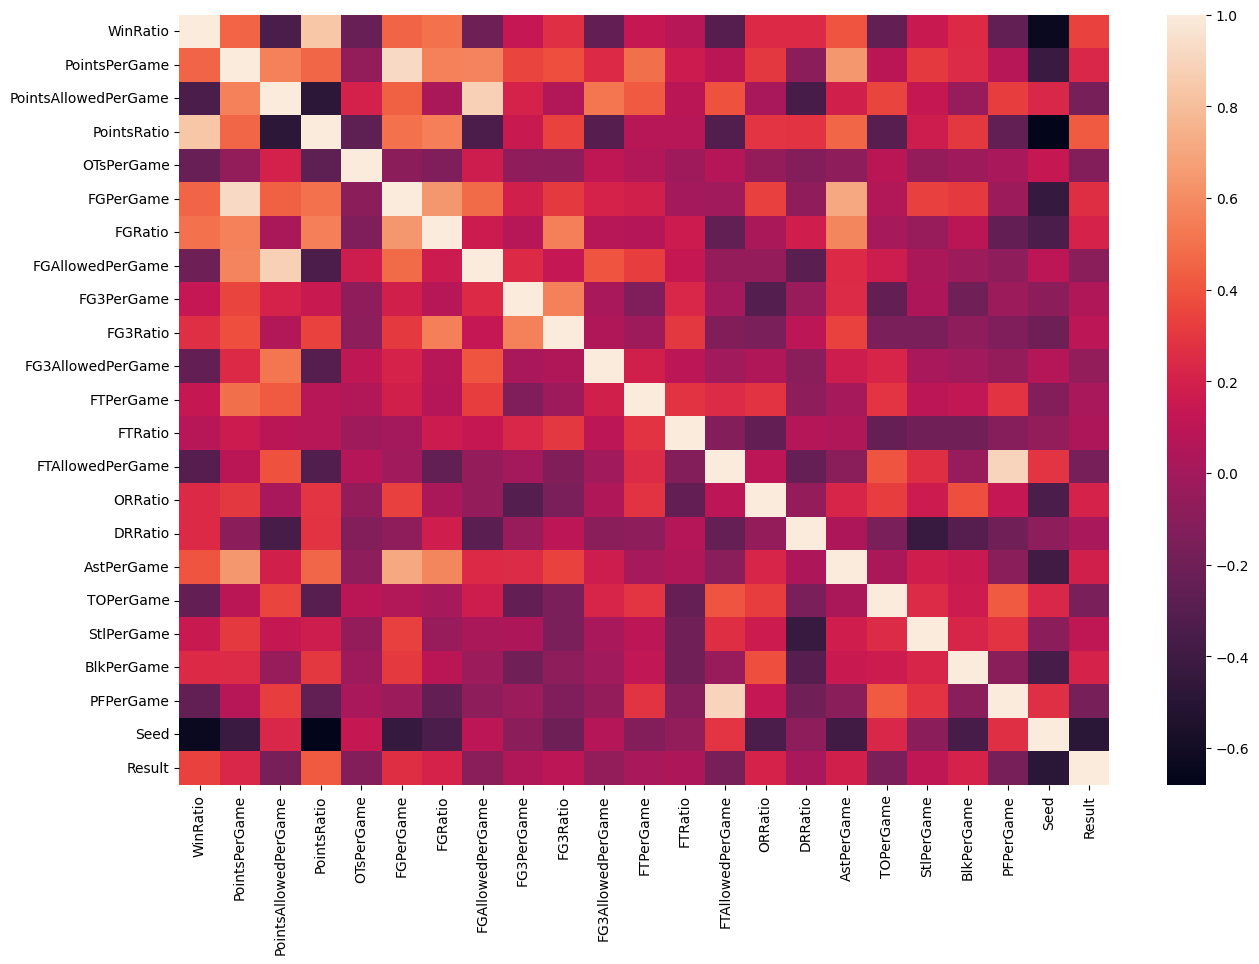

In [ ]:
corrs = round(outscores.corr(), 2)
display(np.abs(corrs['Result']))

import seaborn as sns

plt.figure(figsize=(15,10))
sns.heatmap(corrs)
plt.show()

In [ ]:
import pandas as pd
X = outscores[outscores.columns[:-1]].values
y = outscores['Result'].values

np.random.seed(1)
idx = np.random.permutation(len(X))
train_idx = idx[:int(-0.2*len(X))]
test_idx = idx[int(-0.2*len(X)):]

X_train = X[train_idx]
X_test = X[test_idx]
y_train = y[train_idx]
y_test = y[test_idx]

mins = X_train.min(axis=0)
maxs = X_train.max(axis=0)

X_train = (X_train - mins)/(maxs - mins)
X_test = (X_test - mins)/(maxs - mins)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(1890, 22) (472, 22) (1890,) (472,)


In [ ]:
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier(random_state=1)
model = model.fit(X_train, y_train)
model.score(X_test, y_test)

0.6949152542372882